# 🗃️ Import Libraries :

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
import pandas as pd
from torch.nn.functional import softmax
from tqdm import tqdm

d:\Project-Prep\Play-Store-Scrape\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the Datasets of each Pinjol Platforms :

In [6]:
df_Julo = pd.read_csv("Julo_reviews_1000.csv")
df_Kredivo = pd.read_csv("Kredivo_reviews_1000.csv")
df_IndoDana = pd.read_csv("IndoDana_reviews_1000.csv")
df_RupiahCepat = pd.read_csv("RupiahCepat_reviews_1000.csv")

In [7]:
df_Julo.head()

userName  score                                            content  \
0  Dede Hermawan      1                           Sangat tidak rekomendasi   
1     Atun Zidan      1                                   gk bisa di login   
2    Aden Risman      5                         semua nya bagus .ok banget   
3       Pra Mono      2  aplikasi gak jelas tanda tangan teryata gak ca...   
4        Alf Ono      2  sekarang lama, mesti nunggu 2 hari, itu juga b...   

                    at  
0  2025-07-31 13:59:10  
1  2025-07-31 13:55:06  
2  2025-07-31 12:38:55  
3  2025-07-31 10:57:11  
4  2025-07-31 10:31:35

In [8]:
df_IndoDana.head()

userName  score                                            content  \
0  Anggriana Putri      2                        aneh ga bisa privakasi muka   
1      Yus Miyetti      3              semoga saya bisa mendapatkan pinjaman   
2     Riswan Hasan      5                                    sangat membantu   
3       Supri Yadi      4                                              bagus   
4   lita tinafrila      1  hati hati yg mau pinjam kesini, sepertinya han...   

                    at  
0  2025-07-31 10:51:47  
1  2025-07-31 10:50:31  
2  2025-07-31 10:44:59  
3  2025-07-31 10:42:08  
4  2025-07-31 10:15:32

# Load model & tokenizer

using the pre-trained Roberta model from hugging face : "w11wo/indonesian-roberta-base-sentiment-classifier"

In [9]:
model_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
device = 0 if torch.cuda.is_available() else -1

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device)

label_map = {
    "LABEL_0": "NEGATIVE",
    "LABEL_1": "NEUTRAL",
    "LABEL_2": "POSITIVE"
}

Device set to use cuda:0


# Data Preprocessing :

In [10]:
import re
import emoji

def clean_text(text):
    text = str(text)

    # Hapus emoji
    text = emoji.replace_emoji(text, replace='')

    # Hapus URL
    text = re.sub(r"http\S+|www.\S+", "", text)

    # Hapus karakter aneh, tapi pertahankan alfabet, angka, spasi, dan tanda baca umum
    text = re.sub(r"[^a-zA-Z0-9\s.,!?']", '', text)

    # Normalisasi spasi
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [11]:
df_Julo['cleaned'] = df_Julo['content'].apply(clean_text)
df_IndoDana['cleaned'] = df_IndoDana['content'].apply(clean_text)
df_Kredivo['cleaned'] = df_Kredivo['content'].apply(clean_text)
df_RupiahCepat['cleaned'] = df_RupiahCepat['content'].apply(clean_text)


In [12]:
df_Julo

userName  score  \
0       Dede Hermawan      1   
1          Atun Zidan      1   
2         Aden Risman      5   
3            Pra Mono      2   
4             Alf Ono      2   
..                ...    ...   
995     Rahmatiaalzah      1   
996      Kurang Tidur      5   
997  mfathir ramadhan      3   
998    Jeffri Pemburu      4   
999   Gagak Lembayung      5   

                                               content                   at  \
0                             Sangat tidak rekomendasi  2025-07-31 13:59:10   
1                                     gk bisa di login  2025-07-31 13:55:06   
2                           semua nya bagus .ok banget  2025-07-31 12:38:55   
3    aplikasi gak jelas tanda tangan teryata gak ca...  2025-07-31 10:57:11   
4    sekarang lama, mesti nunggu 2 hari, itu juga b...  2025-07-31 10:31:35   
..                                                 ...                  ...   
995  saya uninstal apk ini,sebab pinjaman sy di tol...  2025-06-20 16:47:28   
996  saya sudah tidak memakai akun julo.tolong hapu...  2025-06-20 16:31:01   
997  padahal ansuran saya jaga trs sebelum jatuh te...  2025-06-20 16:11:55   
998  4 dulu yah saya tes dulu lagi butuh darurat Kr...  2025-06-20 15:40:04   
999  layanan keuangan ny sangat mantap bisa langsun...  2025-06-20 15:25:31   

                                               cleaned  
0                             Sangat tidak rekomendasi  
1                                     gk bisa di login  
2                           semua nya bagus .ok banget  
3    aplikasi gak jelas tanda tangan teryata gak ca...  
4    sekarang lama, mesti nunggu 2 hari, itu juga b...  
..                                                 ...  
995  saya uninstal apk ini,sebab pinjaman sy di tol...  
996  saya sudah tidak memakai akun julo.tolong hapu...  
997  padahal ansuran saya jaga trs sebelum jatuh te...  
998  4 dulu yah saya tes dulu lagi butuh darurat Kr...  
999  layanan keuangan ny sangat mantap bisa langsun...  

[1000 rows x 5 columns]

In [13]:
# Deteksi perangkat
device = 0 if torch.cuda.is_available() else -1

Deteksi GPU :

In [14]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
NVIDIA GeForce RTX 3070 Laptop GPU


In [15]:
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device)

Device set to use cuda:0


In [16]:
# Fungsi prediksi
def get_sentiment(text):
    try:
        result = classifier(text[:512])[0]  # Batasi 512 token (maks BERT)
        return result['label']
    except:
        return "ERROR"

# Sentiment Analysis for each platform :

In [17]:
df_Julo['sentiment'] = df_Julo['cleaned'].apply(get_sentiment)
df_IndoDana['sentiment'] = df_IndoDana['cleaned'].apply(get_sentiment)
df_Kredivo['sentiment'] = df_Kredivo['cleaned'].apply(get_sentiment)
df_RupiahCepat['sentiment'] = df_RupiahCepat['cleaned'].apply(get_sentiment)

d:\Project-Prep\Play-Store-Scrape\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
d:\Project-Prep\Play-Store-Scrape\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
d:\Project-Prep\Play-Store-Scrape\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
d:\Project-Prep\Play-Store-Scrape\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `en

In [18]:
# Lihat hasil
print(df_Julo['sentiment'].value_counts())
print(df_IndoDana['sentiment'].value_counts())
print(df_Kredivo['sentiment'].value_counts())
print(df_RupiahCepat['sentiment'].value_counts())       

sentiment
negative    640
positive    209
neutral     146
ERROR         5
Name: count, dtype: int64
sentiment
positive    599
neutral     199
negative    196
ERROR         6
Name: count, dtype: int64
sentiment
positive    698
negative    229
neutral      63
ERROR        10
Name: count, dtype: int64
sentiment
positive    559
negative    330
neutral     108
ERROR         3
Name: count, dtype: int64


# Save the results :

In [19]:
# Simpan hasil sentiment analysis ke file CSV
#df_Julo.to_csv("Julo_sentiment.csv", index=False)
# df_IndoDana.to_csv("IndoDana_sentiment.csv", index=False)
# df_Kredivo.to_csv("Kredivo_sentiment.csv", index=False)
# df_RupiahCepat.to_csv("RupiahCepat_sentiment.csv", index=False)

# print("Semua hasil sudah disimpan ke file CSV.")


# 📊Exploratory Data Analysis (EDA) :

Import the libraries for EDA :

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [21]:
# Ubah style seaborn
sns.set(style="whitegrid")

Customer Review's timeline in playstore for each platform :

In [52]:
for platform, df in dataframes.items():
    df['at'] = pd.to_datetime(df['at'], errors='coerce')  # pastikan kolom 'at' menjadi datetime
    start_date = df['at'].min()
    end_date = df['at'].max()
    jumlah_hari = (end_date - start_date).days

    print(f"{platform}: review dari {start_date.strftime('%d %b %Y')} sampai {end_date.strftime('%d %b %Y')} ({jumlah_hari} hari)")


Julo: review dari 20 Jun 2025 sampai 31 Jul 2025 (40 hari)
IndoDana: review dari 24 Jul 2025 sampai 31 Jul 2025 (6 hari)
Kredivo: review dari 26 Jul 2025 sampai 31 Jul 2025 (4 hari)
RupiahCepat: review dari 24 Jul 2025 sampai 31 Jul 2025 (6 hari)


In [22]:
# Daftar DataFrame dan nama platform
dataframes = {
    'Julo': df_Julo,
    'IndoDana': df_IndoDana,
    'Kredivo': df_Kredivo,
    'RupiahCepat': df_RupiahCepat
}

## 🍫 Barplot sentiment of each platform :

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\2329683969.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\2329683969.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\2329683969.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\2329683969.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

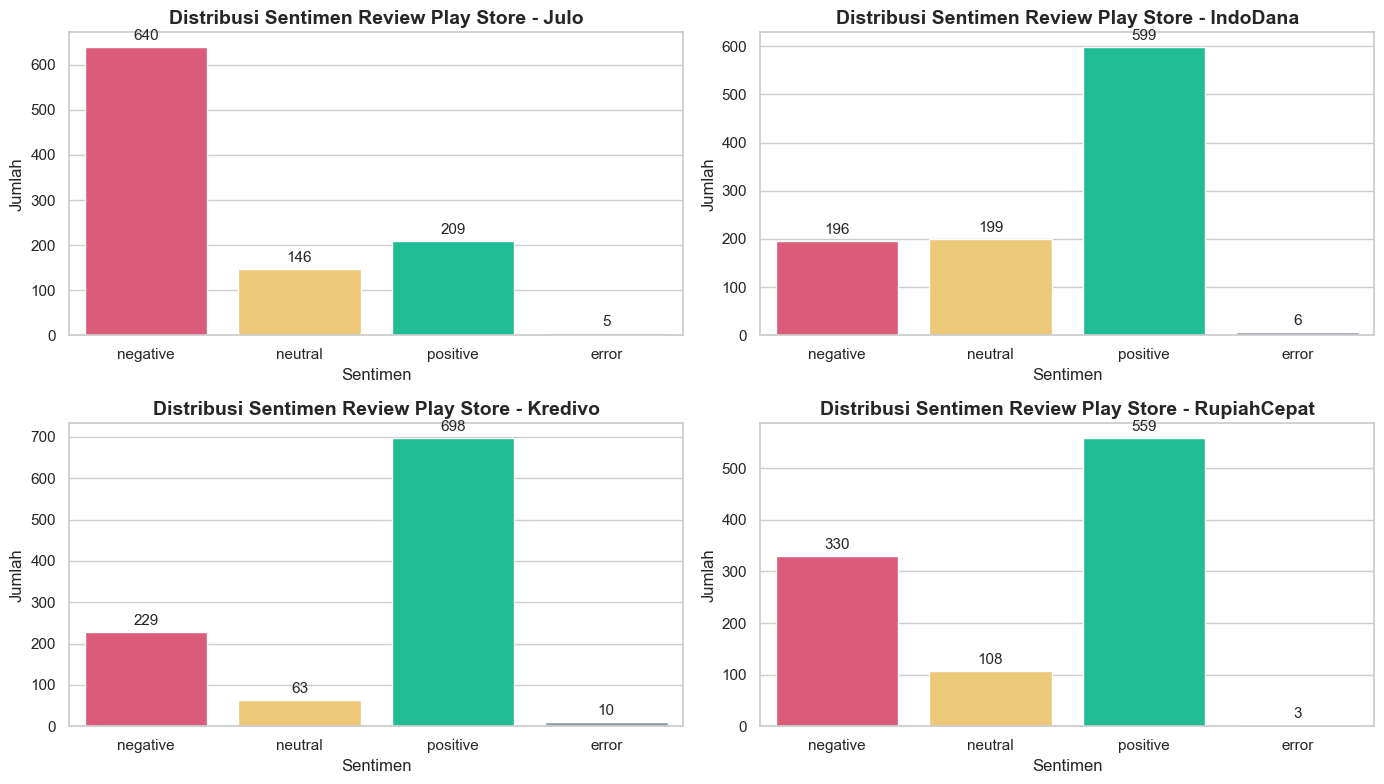

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tema visual seaborn
sns.set_theme(style="whitegrid")

# Ukuran figure besar
plt.figure(figsize=(14, 8))

# Palet warna 4 sentimen (tambah warna untuk 'error')
palette_sentiment = {
    'negative': '#EF476F',  # pink kemerahan
    'neutral': '#FFD166',   # kuning
    'positive': '#06D6A0',  # hijau
    'error': '#8D99AE'      # abu-abu kebiruan
}

# Urutan lengkap sentimen yang diharapkan
expected_sentiments = ['negative', 'neutral', 'positive', 'error']

# Loop tiap platform
for i, (platform, df) in enumerate(dataframes.items(), 1):
    plt.subplot(2, 2, i)

    # Normalisasi kolom sentimen ke lowercase
    df['sentiment'] = df['sentiment'].str.lower().str.strip()

    # Hitung frekuensi berdasarkan urutan sentimen (isi 0 jika tidak ada)
    sentiment_counts = df['sentiment'].value_counts().reindex(expected_sentiments, fill_value=0)

    # Filter hanya yang punya nilai > 0
    sentiment_counts = sentiment_counts[sentiment_counts > 0]

    # Plot bar
    bars = sns.barplot(
        x=sentiment_counts.index,
        y=sentiment_counts.values,
        palette={k: v for k, v in palette_sentiment.items() if k in sentiment_counts.index}
    )

    # Judul dan label
    plt.title(f'Distribusi Sentimen Review Play Store - {platform}', fontsize=14, fontweight='bold')
    plt.xlabel('Sentimen', fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

    # Tambahkan label angka di atas setiap bar
    for bar in bars.patches:
        height = bar.get_height()
        bars.annotate(f'{int(height)}',
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 5),
                      textcoords='offset points',
                      ha='center',
                      fontsize=11,
                      )

# Tata letak rapi
plt.tight_layout()
plt.show()


## 🥧 Piechart comparison of negative and positive sentiment for each platforms :

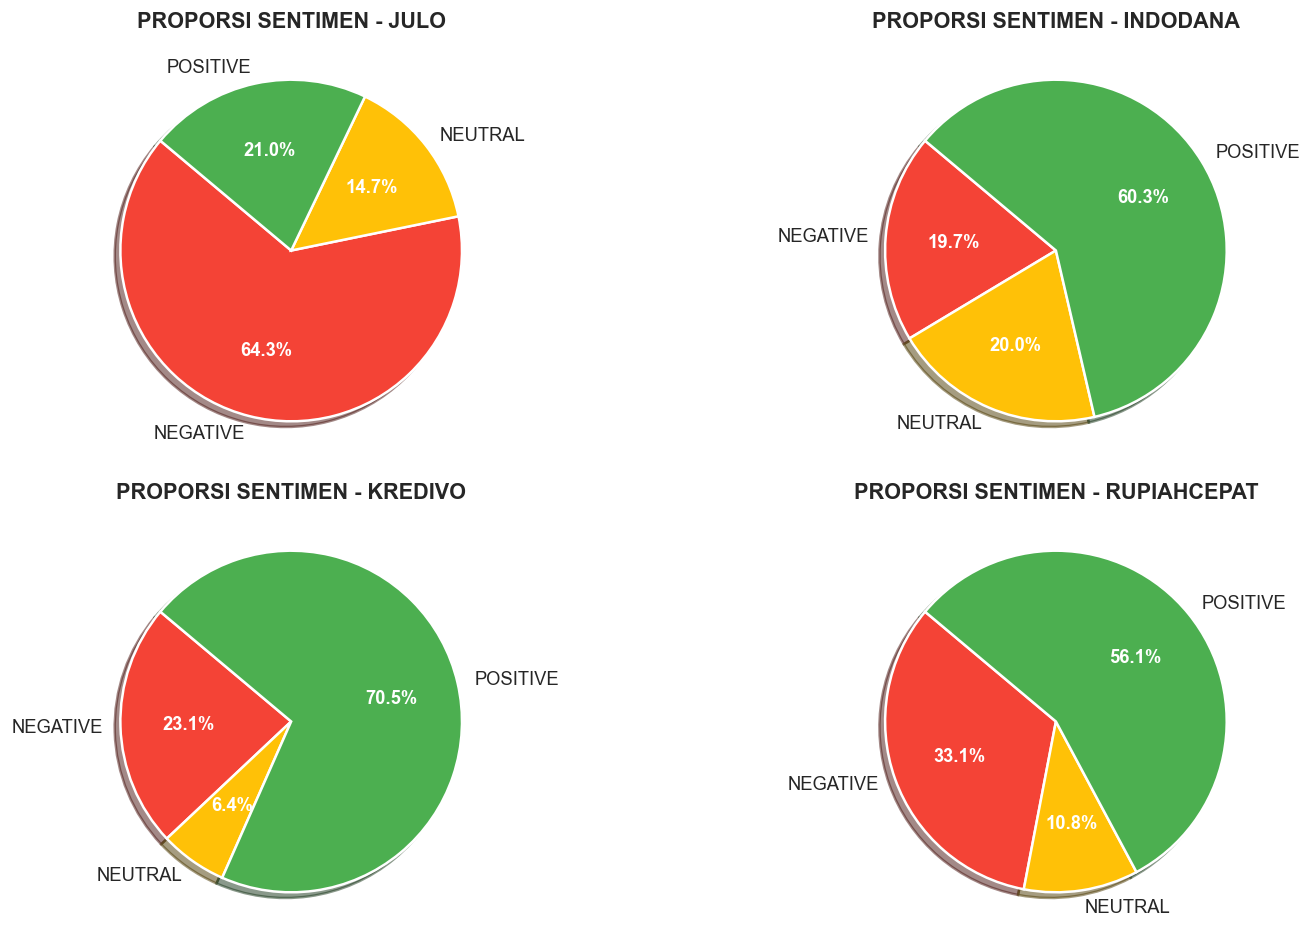

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih font (gunakan font yang tersedia di sistemmu)
plt.rcParams.update({
    'font.size': 10,
    'font.family': 'Segoe UI',  # Bisa diganti dengan 'Comic Sans MS', 'Montserrat', dll
    'text.color': 'black'
})

# Gaya visual bersih
sns.set_style("white")

# Warna sentimen
sentiment_color_map = {
    'positive': '#4CAF50',   # Hijau
    'neutral': '#FFC107',    # Kuning-oranye
    'negative': '#F44336'    # Merah terang
}

# Ukuran figure besar dan HD
plt.figure(figsize=(14, 8), dpi=120)

# Untuk urutan label
sentiment_order = ['negative', 'neutral', 'positive']

# Loop setiap platform
for i, (platform, df) in enumerate(dataframes.items(), 1):
    plt.subplot(2, 2, i)

    sentiment_counts = df['sentiment'].str.lower().value_counts().reindex(sentiment_order, fill_value=0)
    
    # Konversi label jadi huruf besar
    labels = [label.upper() for label in sentiment_counts.index]
    
    colors = [sentiment_color_map[s] for s in sentiment_counts.index]

    wedges, texts, autotexts = plt.pie(
        sentiment_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
        shadow=True
    )

    # Gaya teks persentase
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(11)
        autotext.set_weight('bold')

    plt.title(f'PROPORSI SENTIMEN - {platform.upper()}', fontsize=13, weight='bold')

plt.tight_layout()
plt.show()


# 🌥️ WordCloud 

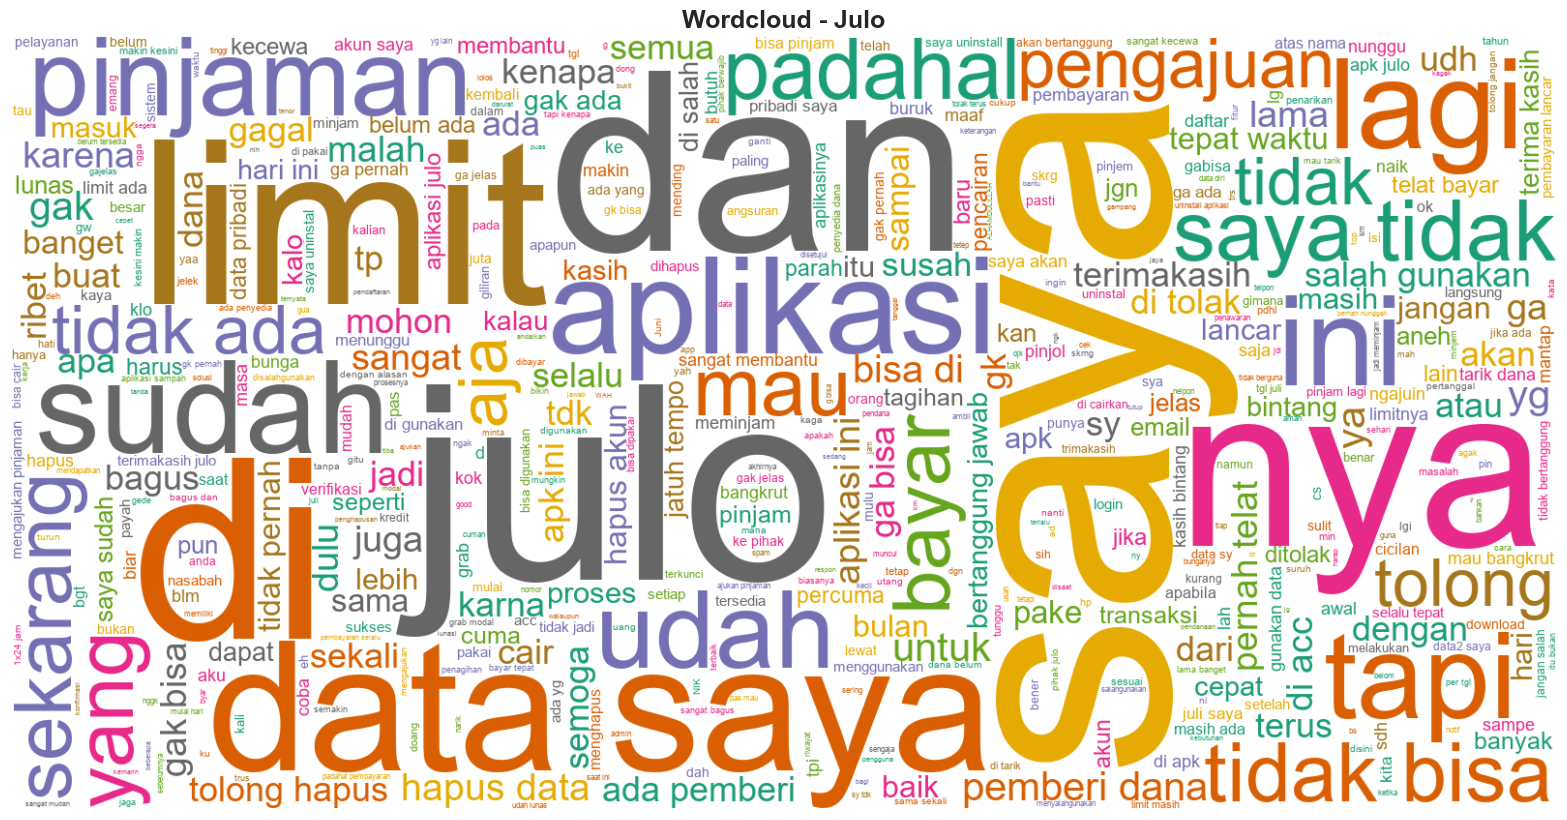

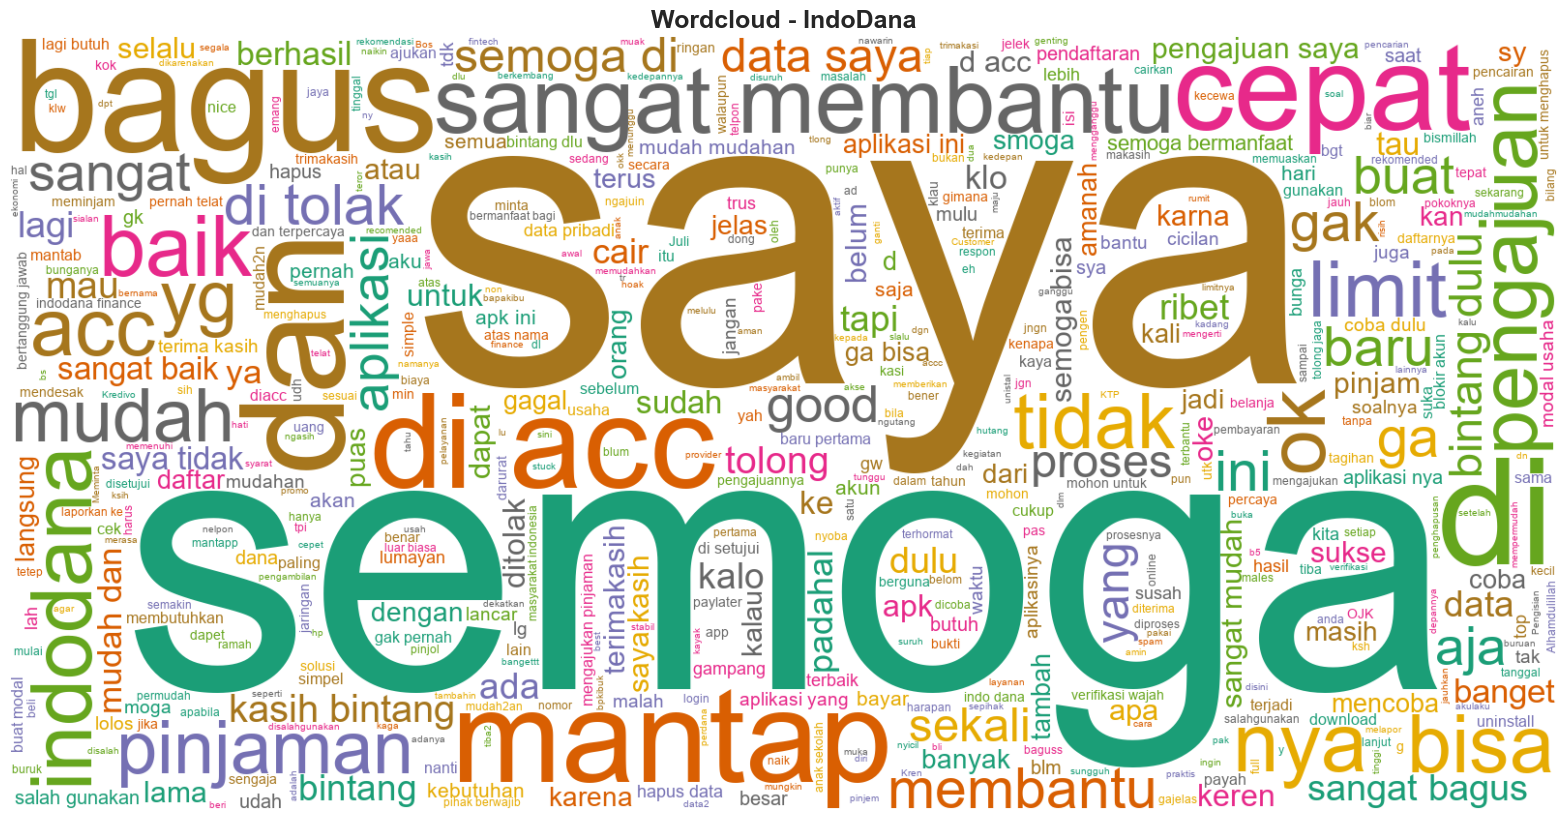

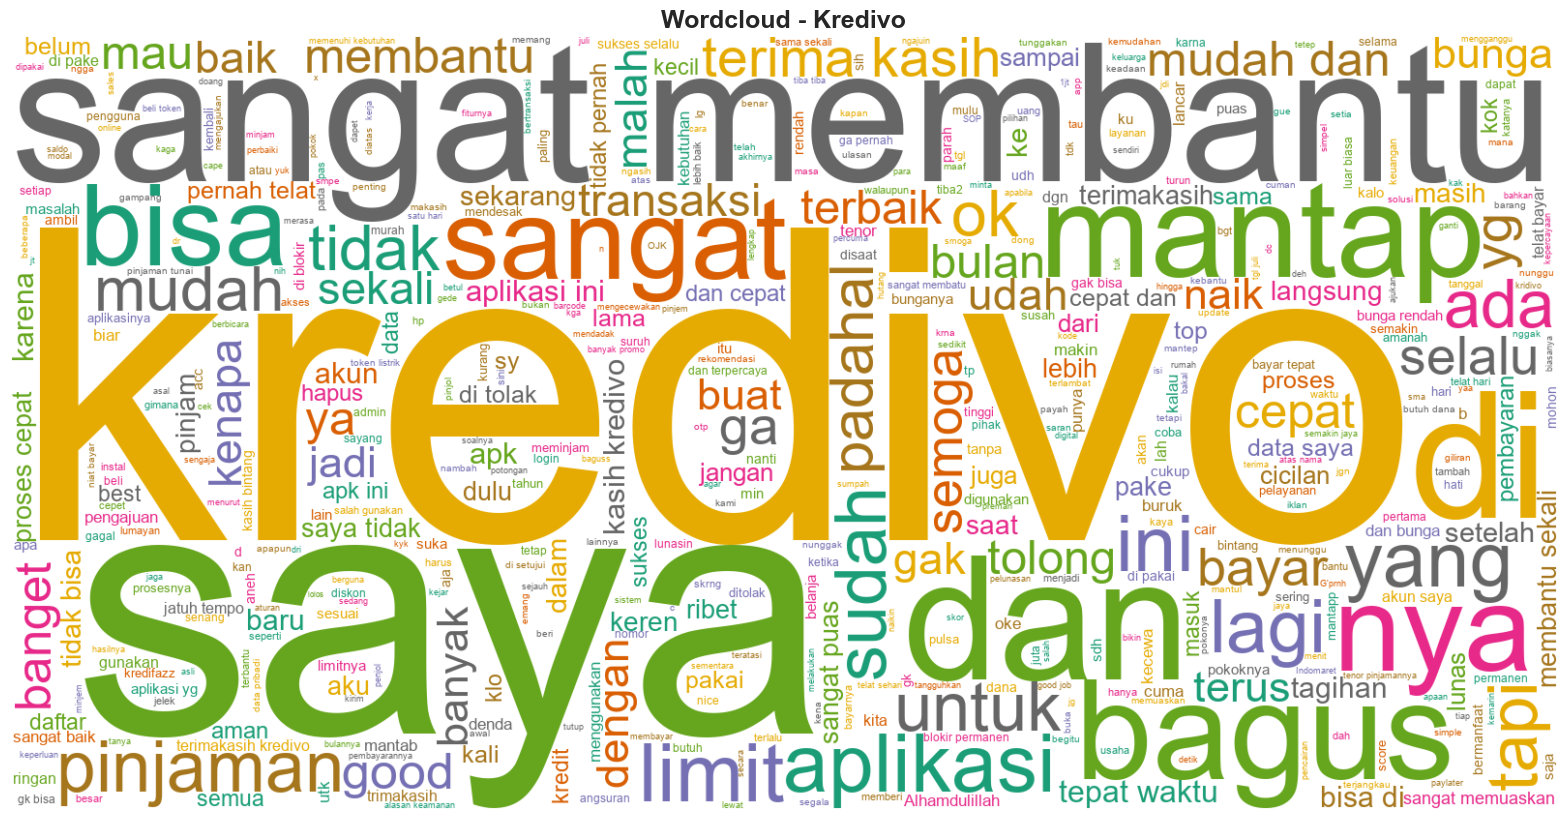

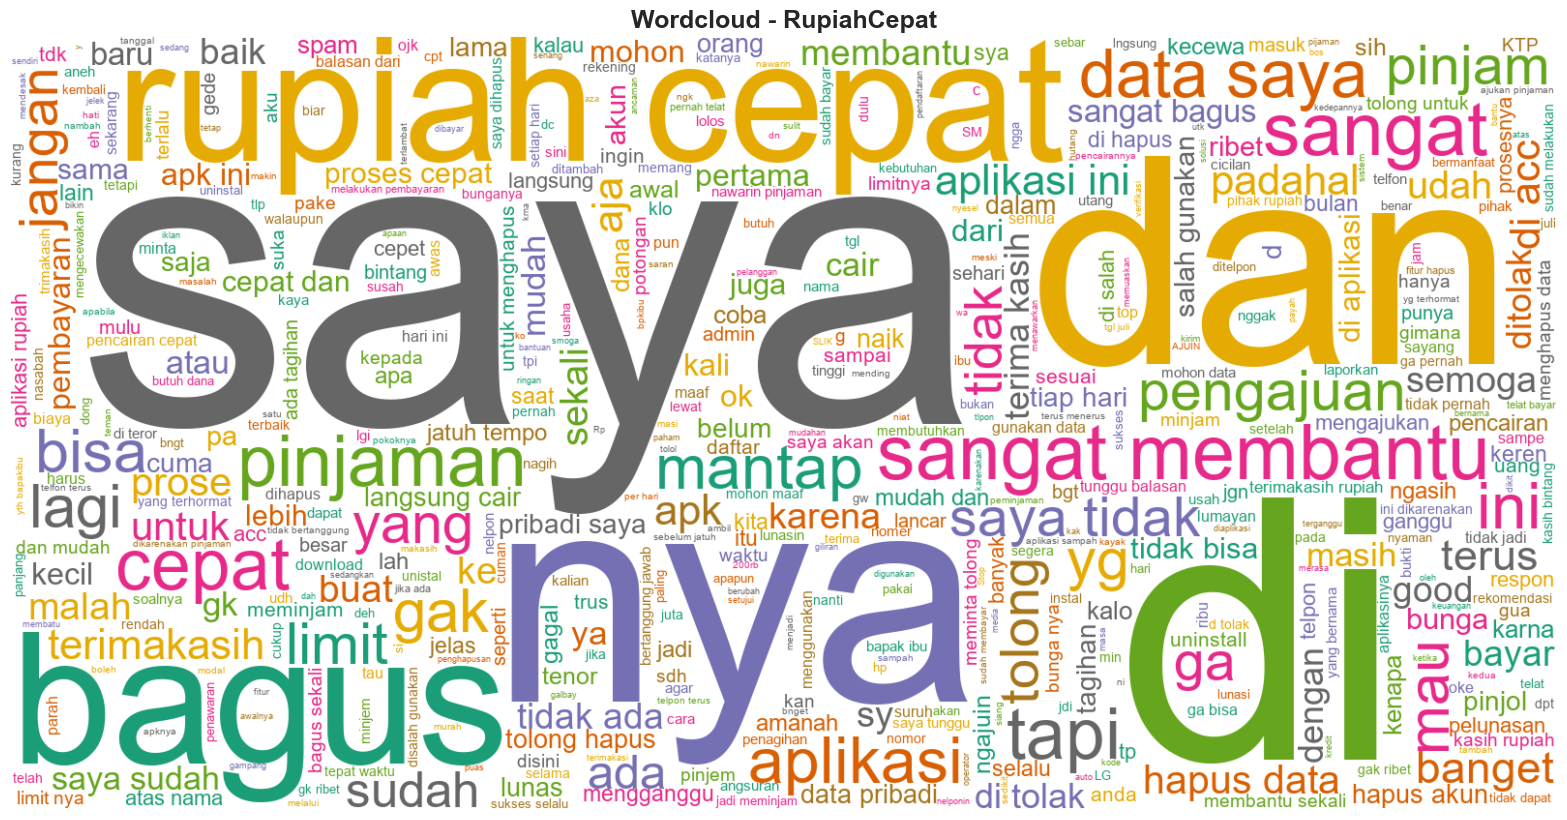

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# (Opsional) Gunakan font custom lokal
# Contoh font: Roboto, OpenSans, atau lainnya di folder kamu
# Pastikan path font sesuai di sistem kamu
font_path = "C:/Windows/Fonts/arial.ttf"  # Atau path ke font pilihanmu

for platform, df in dataframes.items():
    if 'cleaned' in df.columns:
        text = ' '.join(df['cleaned'].dropna())

        wordcloud = WordCloud(
            width=1600,
            height=800,
            background_color='white',
            max_words=500,
            font_path=font_path,
            prefer_horizontal=0.8,
            colormap='Dark2',
            contour_color='steelblue',
            contour_width=1.5
        ).generate(text)

        plt.figure(figsize=(16, 8))  # Ukuran lebih besar
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Wordcloud - {platform}', fontsize=18, fontweight='bold')
        plt.tight_layout(pad=0)
        plt.show()


✅ Pengaturan Global Agar Output Lebih Tajam (HD)

In [54]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150  # default: 100, tingkatkan untuk HD
plt.rcParams['savefig.dpi'] = 300  # resolusi saat disimpan
plt.rcParams['figure.figsize'] = (8, 5)  # ukuran default (lebih besar → lebih jelas)
plt.rcParams['font.size'] = 11  # teks lebih mudah dibaca


## 💯 Score average barplot for each Sentiments

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\364000762.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\364000762.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


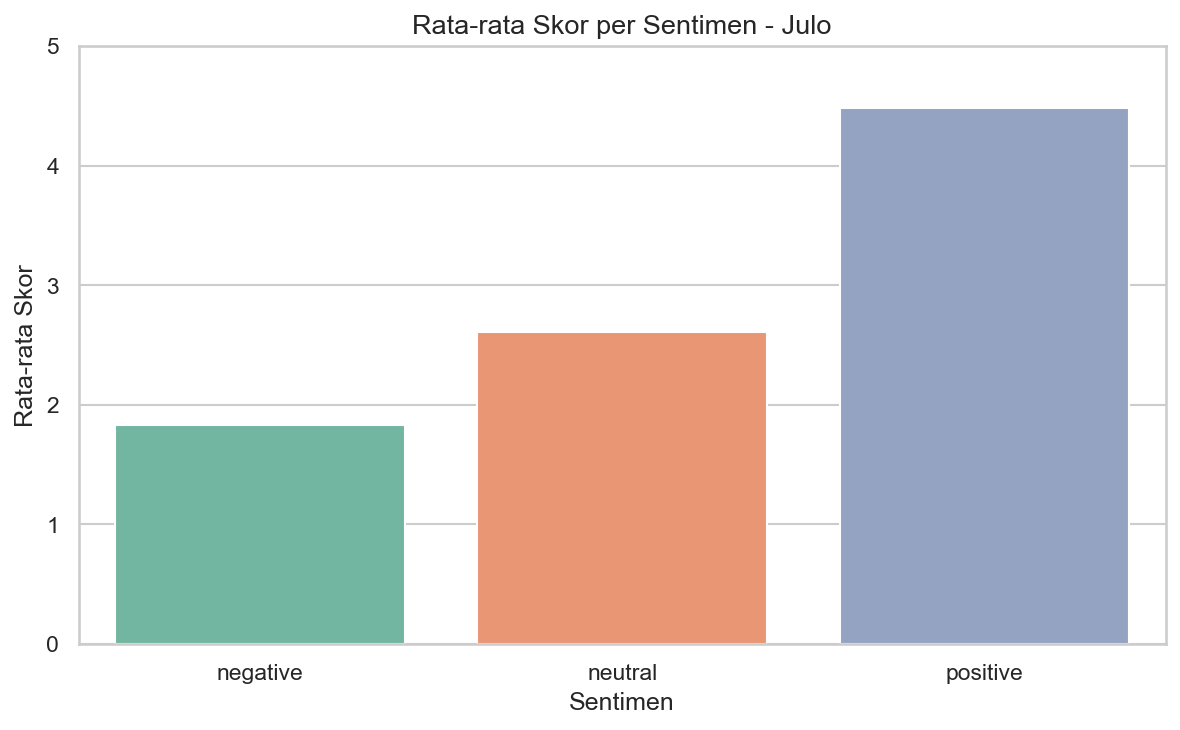

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\364000762.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\364000762.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


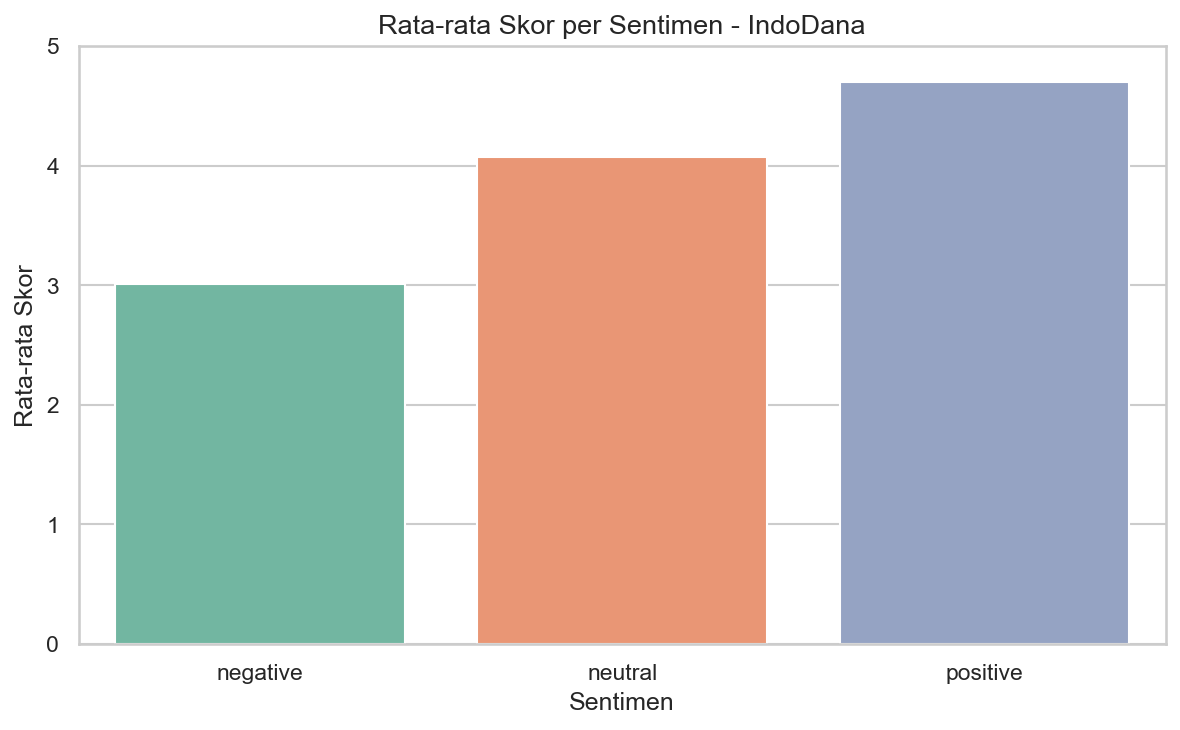

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\364000762.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\364000762.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


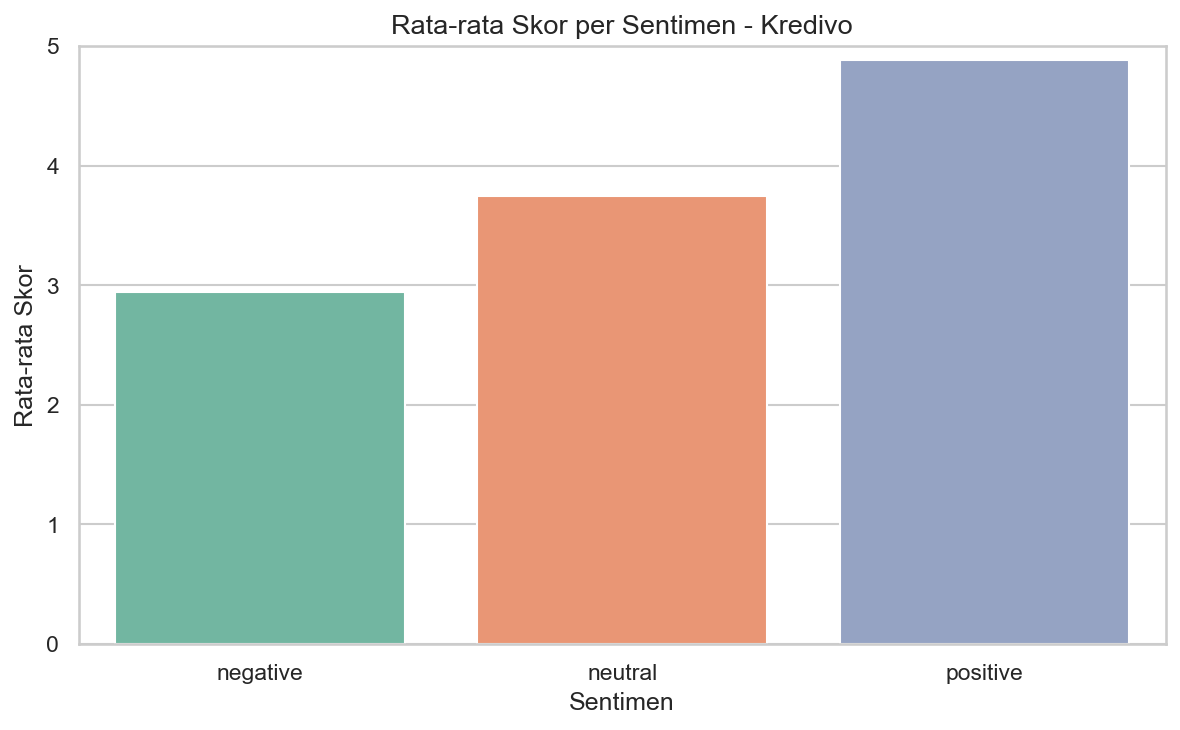

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\364000762.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10960\364000762.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


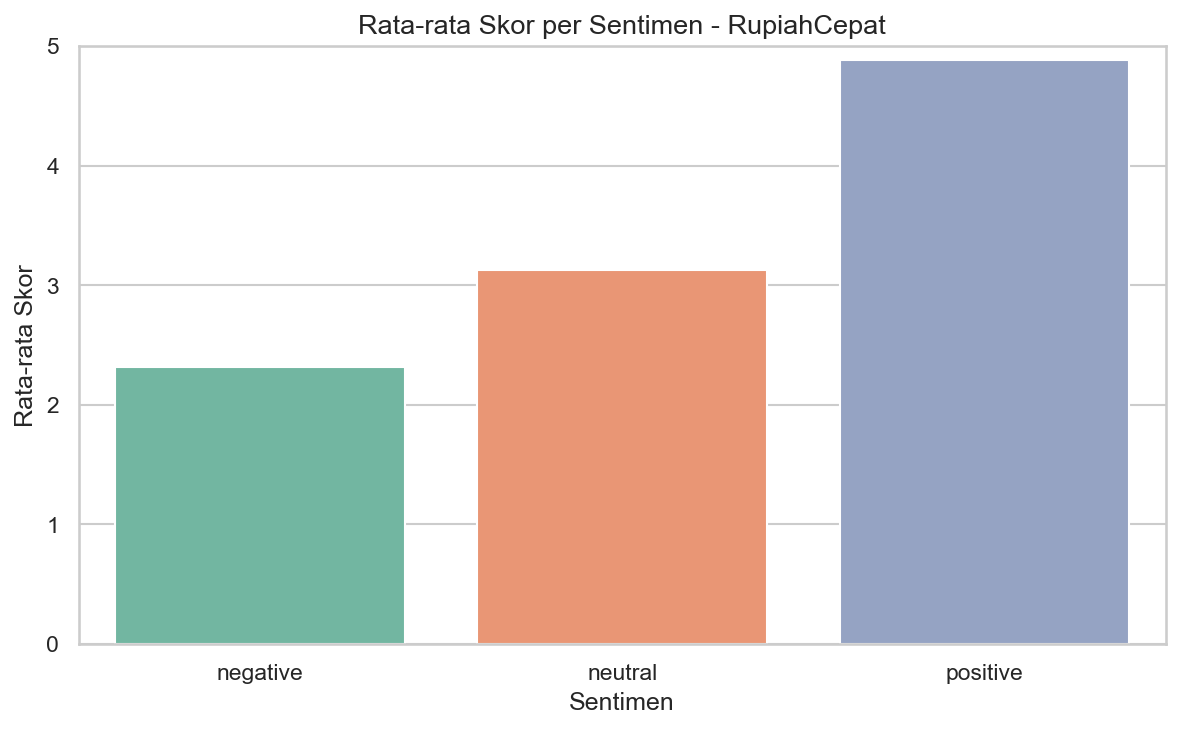

In [ ]:
sentiment_order = ['negative', 'neutral', 'positive']

for platform, df in dataframes.items():
    # Atur urutan kategori secara eksplisit
    df['sentiment'] = pd.Categorical(df['sentiment'], categories=sentiment_order, ordered=True)

    plt.figure()
    sns.barplot(
        data=df,
        x='sentiment',
        y='score',
        estimator='mean',
        ci=None,
        palette=sns.color_palette("Set2", n_colors=3),
        order=sentiment_order  # ini penting untuk jaga urutan
    )
    plt.title(f'Rata-rata Skor per Sentimen - {platform}', fontsize=13)
    plt.ylabel('Rata-rata Skor')
    plt.xlabel('Sentimen')
    plt.ylim(0, 5)
    plt.tight_layout()
    plt.show()


## 🥵 Heatmap Correlation between Sentiment and Score

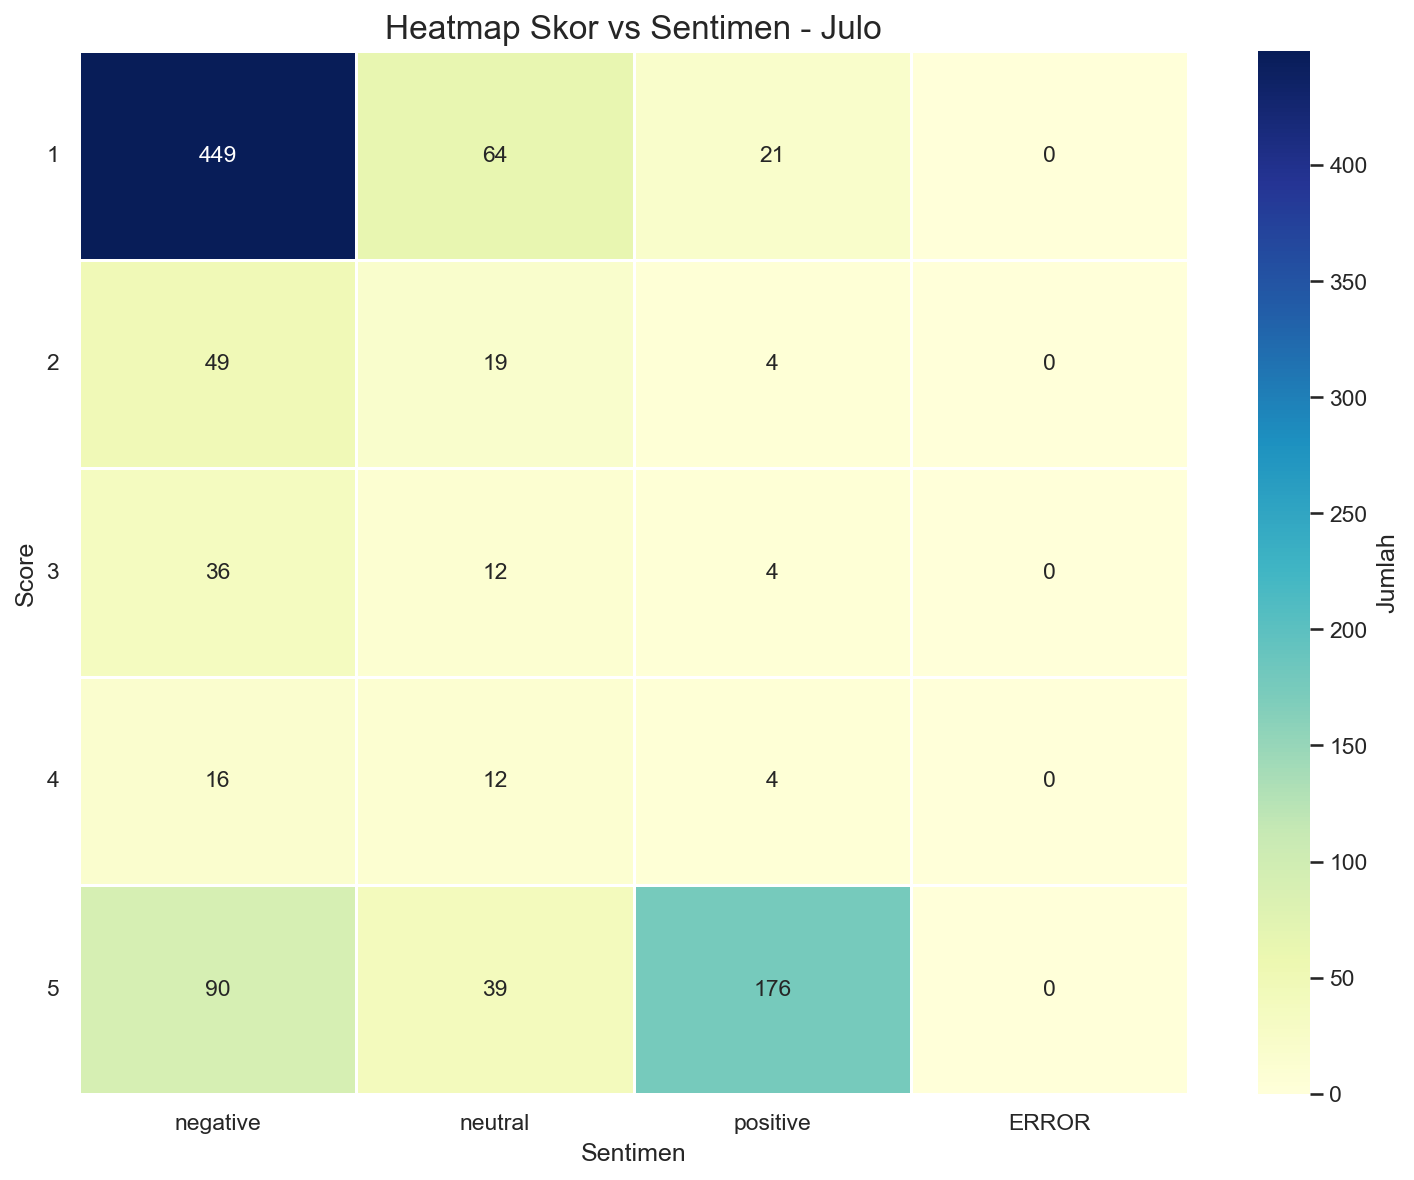

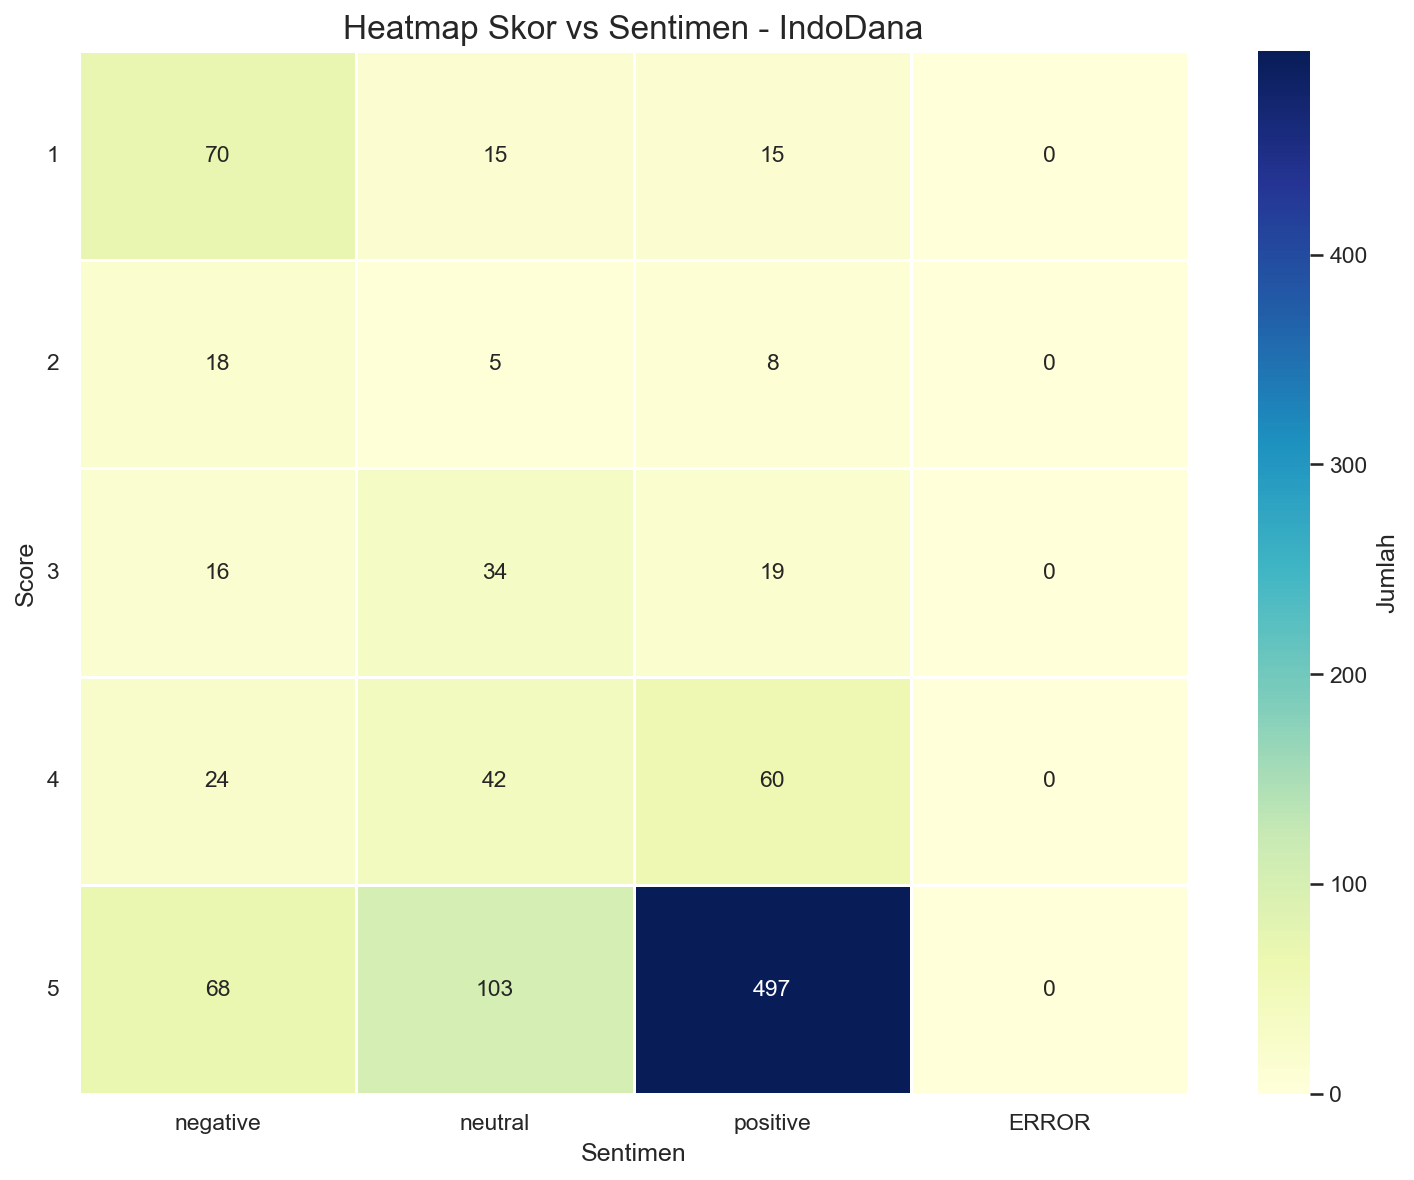

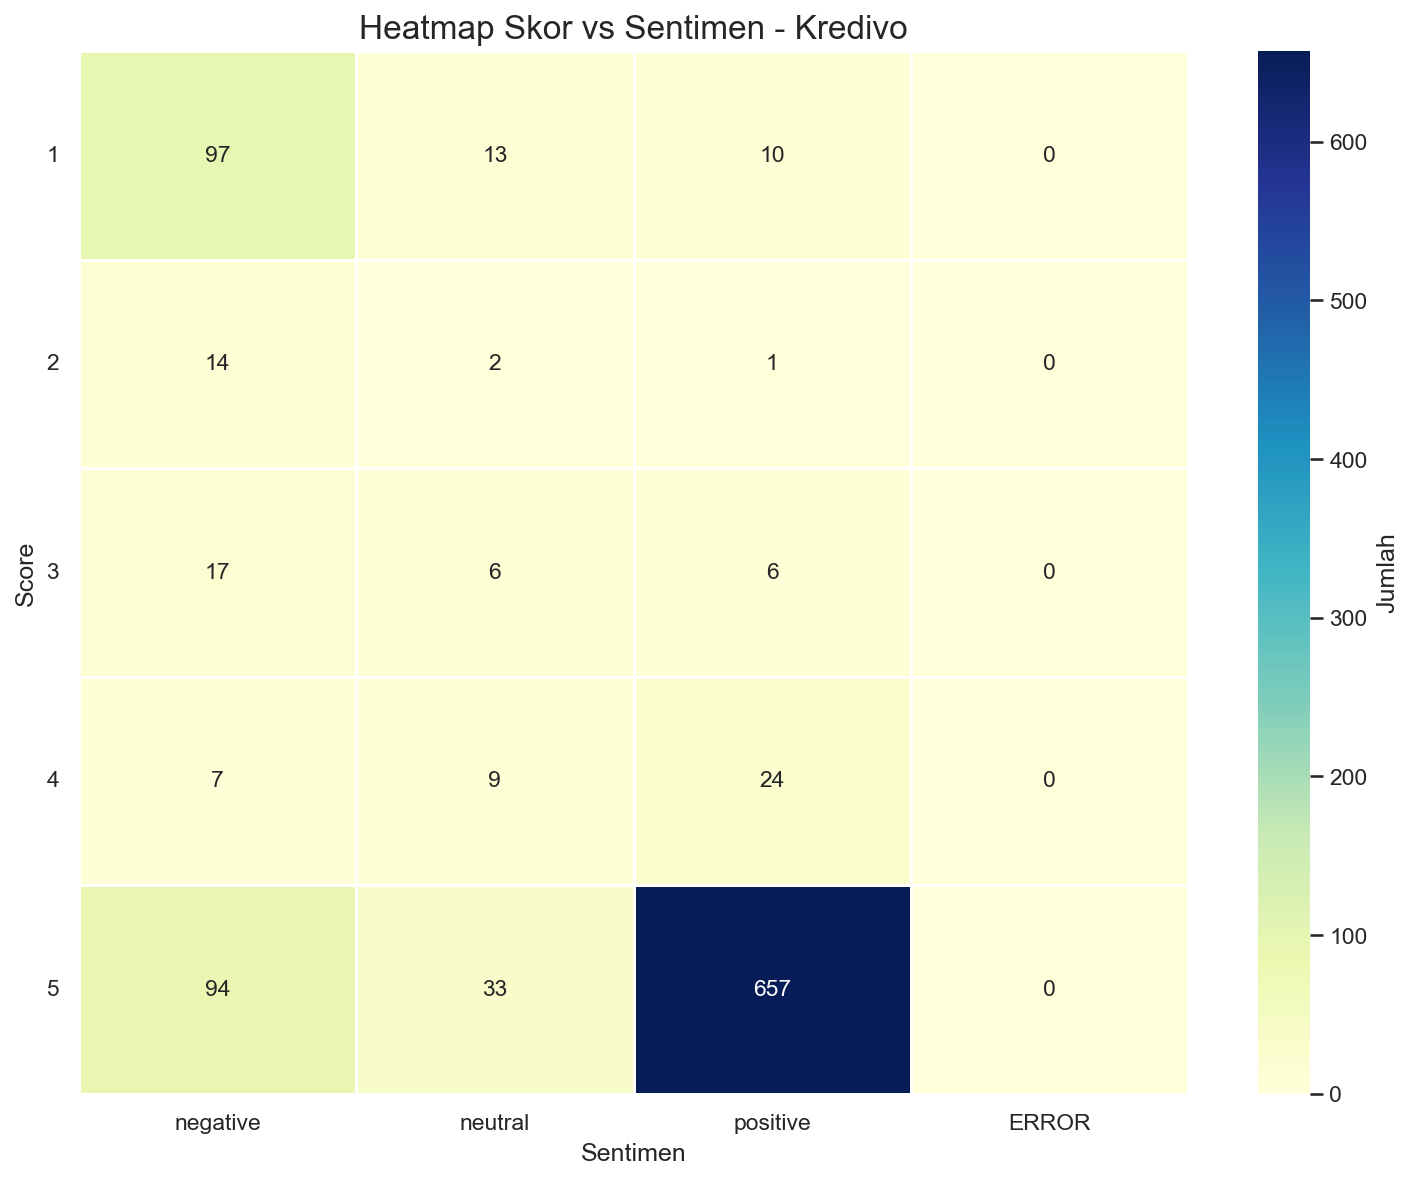

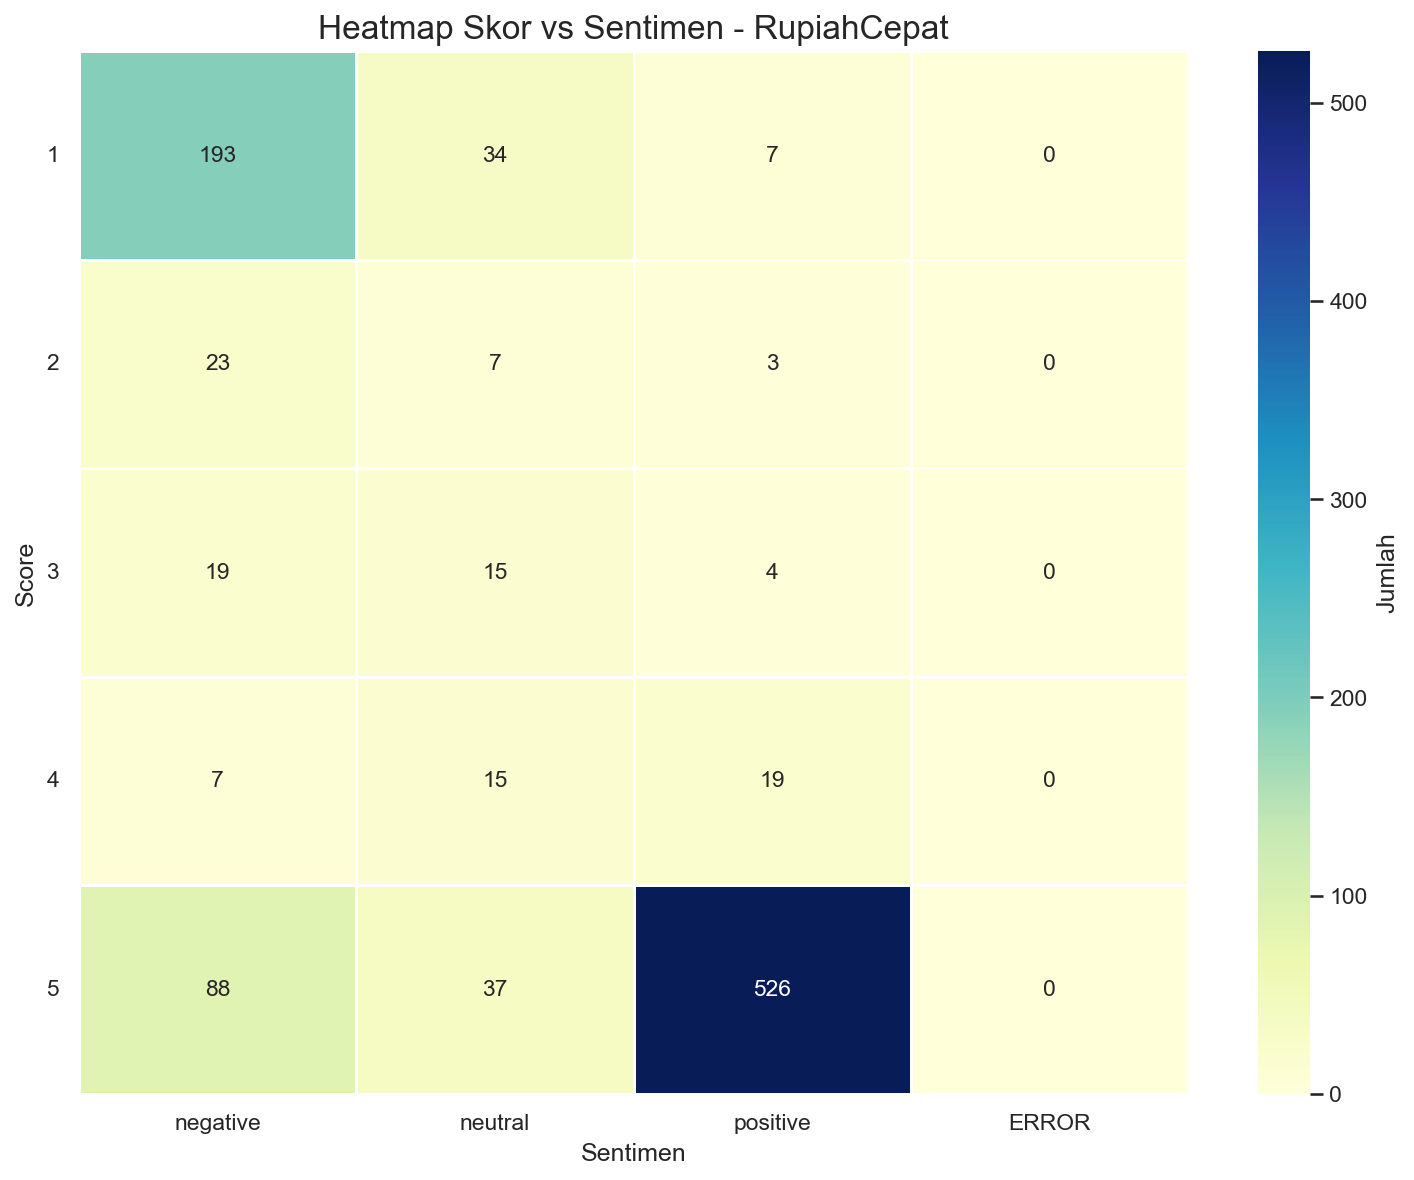

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan urutan sentimen tetap konsisten dan tampil semua
sentiment_order = ['negative', 'neutral', 'positive', 'ERROR']

for platform, df in dataframes.items():
    # Pastikan kolom sentiment dalam kategori terurut
    df['sentiment'] = pd.Categorical(df['sentiment'], categories=sentiment_order, ordered=True)

    # Buat crosstab, dan pastikan semua kolom sentiment ditampilkan
    cross_tab = pd.crosstab(df['score'], df['sentiment']).reindex(columns=sentiment_order, fill_value=0)

    # Ukuran besar, DPI tinggi untuk HD
    plt.figure(figsize=(10, 8), dpi=150)

    # Heatmap dengan nilai label yang jelas
    sns.heatmap(
        cross_tab,
        annot=True,
        fmt='d',
        cmap='YlGnBu',
        linewidths=0.5,
        linecolor='white',
        cbar_kws={'label': 'Jumlah'}
    )

    plt.title(f'Heatmap Skor vs Sentimen - {platform}', fontsize=16)
    plt.xlabel('Sentimen', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


## 🔗 The correlation score for (between) sentiment and score

In [63]:
sentiment_map = {'negative': 0, 'neutral': 1, 'positive': 2}

for platform, df in dataframes.items():
    df_temp = df.copy()
    df_temp['sentiment_num'] = df_temp['sentiment'].map(sentiment_map)
    corr = df_temp[['sentiment_num', 'score']].corr().iloc[0,1]
    print(f"{platform} - Korelasi antara Sentimen dan Skor: {corr:.2f}")


Julo - Korelasi antara Sentimen dan Skor: 0.58
IndoDana - Korelasi antara Sentimen dan Skor: 0.50
Kredivo - Korelasi antara Sentimen dan Skor: 0.61
RupiahCepat - Korelasi antara Sentimen dan Skor: 0.70
